# 心血管疾病预测

*平台上训练可能比较慢，你可以从[这里](https://isrc.iscas.ac.cn/gitlab/summer2020/students/proj-2033168/-/blob/master/predict.ipynb)得到每个单元的输出，也可以在 [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/LovelyBuggies/Python_Cardiovascular_Disease_Predict/master?filepath=predict.ipynb) 上发布以训练。*

## 背景

心脑血管疾病是一种严重威胁人类，特别是中老年人健康的常见病，具有高患病率、高致残率和高死亡率的特点，即使应用目前最先进、完善的治疗手段，仍有许多脑血管意外幸存者生活不能完全自理，全世界每年死于心脑血管疾病的人数高达1500万人，居各种死因首位。

近年来，神经网络等深度学习的技术正逐渐应用于临床和诊断。逐渐丰富的数据集能够帮助我们根据对患者记录的统计进行数据分析来预测心血管疾病的患病情况。在分类问题中，分类的目的是从一组数据中选择一个类别（例如，给出一张苹果或橘子的图片，并确定图片中的水果是什么）。本项目使用心血管疾病数据集，该数据集提供 11 个特征值和 1 个目标值，包含 70,000 例患者记录的数据，建立了预测样本是否有心血管疾病的算法模型。最终的预测结果被证明有较高的准确性，说明了将深度学习算法应用于疾病检测的潜力。

## 数据预处理

数据的预处理是指对所收集数据进行分类或分组前所做的审核、筛选、排序等必要的处理。数据预处理技术是为了提高数据分析的质量而产生的，方法包括数据清理、数据集成、数据变换，数据归约等。

我们首先从 Kaggle 数据集 https://www.kaggle.com/sulianova/cardiovascular-disease-dataset 中下载数据，并将数据放到合适的文件夹以供加载。然后我们对数据进行了简单的处理。

### 数据探索

在进行心血管疾病预测之前，我们首先探索一下该数据集的数据特征。

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

用 pandas 读取数据集，并显示数据开头的项，或者显示数据项类型。我们可以看出，载入的数据中包含年龄、性别、吸烟与否等各项指标，以及它们对应的数据量和数据类型。

In [2]:
data = pd.read_csv("./data/cardio_train.csv", sep=";")

# 展示数据信息
# data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### 数据预处理

为了方便我们分析数据，我们进行了数据清理——剔除数据中的无效值也就是血压过高或者过低的值和空项 NULL（如果有的话）。

In [3]:
# 检查数据中是否含有空项
data.isnull().values.any()

False

In [4]:
if "id" in data:
    data.drop("id",axis=1,inplace=True)

data.drop_duplicates(inplace=True)

# 将血压过高或者过低的异常值剔除
out_lier = (data["ap_hi"] > 250) | (data["ap_lo"] > 200) | (data["ap_hi"] < 0) | (data["ap_lo"] < 0)
data = data[~out_lier]

# 展示经过数据预处理之后的信息
# data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68975 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68975 non-null  int64  
 1   gender       68975 non-null  int64  
 2   height       68975 non-null  int64  
 3   weight       68975 non-null  float64
 4   ap_hi        68975 non-null  int64  
 5   ap_lo        68975 non-null  int64  
 6   cholesterol  68975 non-null  int64  
 7   gluc         68975 non-null  int64  
 8   smoke        68975 non-null  int64  
 9   alco         68975 non-null  int64  
 10  active       68975 non-null  int64  
 11  cardio       68975 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.8 MB


### 数据可视化

数据可视化主要旨在借助于图形化手段，清晰有效地传达与沟通信息。良好的数据展示能够方便我们更高效地进行数据分析。我们可以绘制每一个特征的数值分布直方图和折线图来将我们的数据集可视化（更多关于配置项的分析结果可以参考配置文件报告）。

In [5]:
# 将年龄单位转化成年
data['age'] = data['age'].map(lambda x : x // 365)

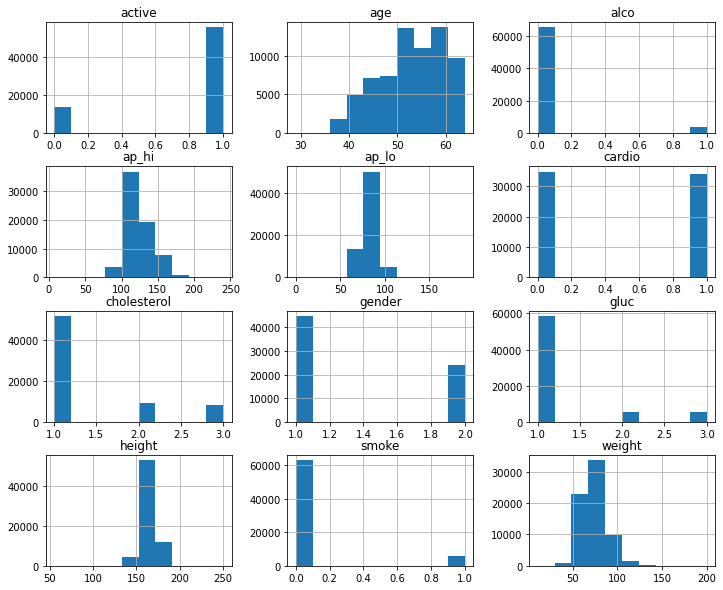

In [6]:
# 绘制特征数值分布直方图
data.hist(figsize=(12,10))
plt.show()

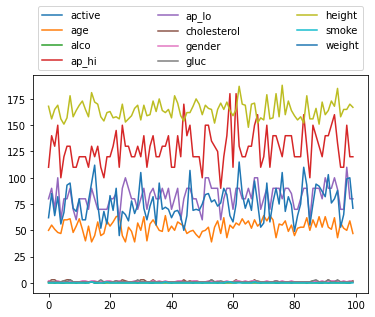

In [7]:
data_plot = data

# 绘制特征数值分布折线图
data_plot[['active','age','alco','ap_hi','ap_lo','cholesterol','gender','gluc','height','smoke','weight']].head(100).plot()
plt.legend(bbox_to_anchor=(0.,1.,1.,0.), loc=3, ncol=3, mode="expand")
plt.show()

### 配置文件报告

`pandas_profiling` 是一个从 pandas `dataFrame` 中生成配置文件报告的工具，是一个能够帮助我们进行数据预处理的工作流。通过报告，我们能更好地了解数据集，报告中包括每一个变量的数值分布、参数的相关性、缺失值、样本展示等等。我们在此使用它，将生成的报告导出成 HTML 格式。我们发现各个参数都展示了一定的特性（没有相关性特别高的变量），因此不需要进行剔除变量（数据降维）。

In [8]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data, title='Cardio-Disease Report', explorative=True)

# 可以选择在 notebook 中展示
# profile.to_notebook_iframe()

# 我们将数据分析报告放到了 html 文件中
if not os.path.exists("cardio_report.html"):
    profile.to_file("cardio_report.html")

/usr/local/lib/python3.7/site-packages/pandas_profiling/visualisation/plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


### 分离数据

我们现有的数据都在一个 csv 文件中，我们需要分离数据以得到训练集和验证集。

我们现将标签和真值分离出来。然后，我们使用了 `sklearn.model_selection` 中的分离函数，设置分离比率为 9 比 1，分离之后训练集中还有 62077 个项，验证集中含有 6898 个项。

*注意：验证集是模型训练过程中单独留出的样本集，它可以用于调整模型的超参数和用于对模型的能力进行初步评估；而测试集是用来评估模最终模型的泛化能力。但不能作为调参、选择特征等算法相关的选择的依据。这里我们根据最后的模型准确率进行调参，因此称之为验证集。*

In [9]:
# 将 labels 从 data 中提取出来
labels = data['cardio']
data = data.drop(['cardio'], axis=1)

In [10]:
from sklearn.model_selection import train_test_split

# 分离数据集
train, valid, train_labels, ground_truth = train_test_split(data, labels, test_size=0.1, random_state=0)

# 分别展示训练集和验证集的数据
train.info()
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62077 entries, 709 to 69281
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          62077 non-null  int64  
 1   gender       62077 non-null  int64  
 2   height       62077 non-null  int64  
 3   weight       62077 non-null  float64
 4   ap_hi        62077 non-null  int64  
 5   ap_lo        62077 non-null  int64  
 6   cholesterol  62077 non-null  int64  
 7   gluc         62077 non-null  int64  
 8   smoke        62077 non-null  int64  
 9   alco         62077 non-null  int64  
 10  active       62077 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 5.7 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6898 entries, 51756 to 14694
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          6898 non-null   int64  
 1   gender       6898 non-null   int64  
 2   height 

## 深度学习模型

神经网络是一种比标准机器学习更复杂、更强大的算法，属于深度学习模型。Keras 是一个开源人工神经网络库，可以作为 Tensorflow、Microsoft-CNTK 和 Theano 的高阶应用程序接口，进行深度学习模型的设计、调试、评估、应用和可视化。在这里，我们用 Keras 搭建一个顺序神经网络，并训练好的网络进行心血管疾病预测。

In [11]:
import keras
from keras.models import Sequential, Input
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn import metrics

### 全连接神经网络

#### 构建模型

Keras 的顺序模型适用于每一层有一个输入张量和一个输出张量的普通层堆栈。在构建新的顺序体系结构时，使用 `add` 递增地堆叠层并经常打印模型是一种常用的构建和 debug 神经网络的方法：

In [12]:
# 构建神经网络顺序模型
model = Sequential()

# 为模型增加全连接层
model.add(Dense(16, input_dim=data.shape[1], kernel_initializer='random_uniform', activation='relu'))
model.add(Dropout(0.7))

model.add(Dense(64, kernel_initializer='random_uniform', activation='relu'))
model.add(Dropout(0.7))

model.add(Dense(32, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 打印模型
# model.layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1088      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
______________________________________________________

#### 模型解释

`Dense` 就是常提到和用到的全连接层，相当于简单的特征加权 。`Dense` 实现的操作为：`output = activation(dot(input, kernel) + bias)` 其中 `activation` 是按逐个元素计算的激活函数，`kernel` 是由网络层创建的权值矩阵，以及 `bias` 是其创建的偏置向量（*我们这里没有用偏置*）。构建神经网络模型的时候，我们首先先添加一个 `Dense` 层，输入的维度是训练集的列数也就是特征数；之后，我们就不必定义 `input` 规格了。

因为不同特征的数值差别可能很大，我们需要进行正则化处理。Keras 中，我们可以使用 `Dopout` 正则化，其最简单的 `Dopout` 形式是`Dropout` 核心层。在创建 `Dopout` 正则化时，可以将 `dropout_rate` 的设为某一固定值，当 `dropout_rate=0.7` 时，实际上保留概率为 0.3。将 `Dropout` 层添加到模型的现有层和之前的输出层之间，神经网络将这些输出反馈到后续层中。

#### 训练模型

对刚才构建好的神经网络进行训练。我们采用交叉熵作为损失函数，Adam 作为优化器进行模型编译。

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

模型拟合时，我们先将批大小设置为 64（*通常而言，批量越少，训练越慢，但是单次得到的训练更准确*），简单训练 20 个 epoch，并将每次训练的结果记录下来。

In [14]:
hist = model.fit(train, train_labels, batch_size=64, validation_data=(valid, ground_truth), 
               epochs=20, verbose=1)

Epoch 1/20
970/970 [==============================] - 1s 1ms/step - loss: 0.6721 - accuracy: 0.5783 - val_loss: 0.6385 - val_accuracy: 0.7012
Epoch 2/20
970/970 [==============================] - 1s 968us/step - loss: 0.6633 - accuracy: 0.5947 - val_loss: 0.6425 - val_accuracy: 0.6744
Epoch 3/20
970/970 [==============================] - 1s 891us/step - loss: 0.6601 - accuracy: 0.6009 - val_loss: 0.6232 - val_accuracy: 0.7115
Epoch 4/20
970/970 [==============================] - 1s 920us/step - loss: 0.6591 - accuracy: 0.6037 - val_loss: 0.6081 - val_accuracy: 0.7163
Epoch 5/20
970/970 [==============================] - 1s 871us/step - loss: 0.6586 - accuracy: 0.6034 - val_loss: 0.6312 - val_accuracy: 0.6932
Epoch 6/20
970/970 [==============================] - 1s 888us/step - loss: 0.6585 - accuracy: 0.6022 - val_loss: 0.6150 - val_accuracy: 0.7124
Epoch 7/20
970/970 [==============================] - 1s 932us/step - loss: 0.6576 - accuracy: 0.6041 - val_loss: 0.6204 - val_accuracy: 0

接下来，我们将训练过程中的准确率和损失变化展示出来。

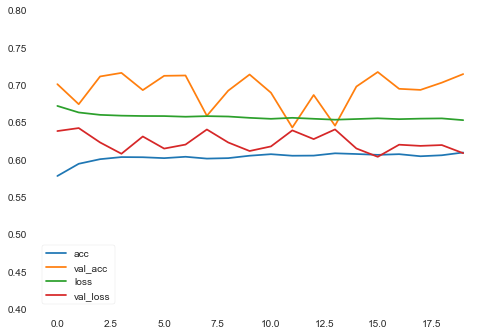

In [15]:
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.ylim((.4, .8))
plt.legend()
plt.show()

我们发现，随着模型训练，训练集和验证集的损失都在呈现减小的趋势，而准确率在随之提升。

#### 模型评估

为了衡量我们模型的好坏，我们用预测准确率对模型的效果进行评估。

In [16]:
# 训练集预测结果
prediction = model.predict(train)
prediction = (prediction > 0.5) * 1

# 计算准确率
acc_ann = round(metrics.accuracy_score(train_labels, prediction) * 100, 2)
acc_ann

70.87

In [17]:
# 验证集预测结果
prediction_valid = model.predict(valid)
prediction_valid = (prediction_valid > 0.5) * 1

# 计算准确率
acc_valid_ann = round(metrics.accuracy_score(ground_truth, prediction_valid) * 100, 2)
acc_valid_ann

71.47

本次训练，我们得到了训练集准确率为 71.35%，验证集准确率 71.38%（注意，随着数据集划分不同，每次的结果可能也不同）。

#### 模型调参

在我们的这个模型中，包含的网络层和用到的 tricks 比较少。不过由于一般深度学习实验，相比普通机器学习任务，时间较长，因此调参技巧就显得尤为重要。尽管大部分的调参过程还是需要手动尝试，但是调参还是有一些技巧的，比如：

- 当在一定 epochs 内呈现收敛趋势时，不必跑更多个周期；
- 如果训练集和验证集准确率差很多，可能出现了欠拟合和过拟合，考虑调整步长；
- 有些参数可以使用经验数值，比如 dropout 的 0.3、0.5、0.7 ...；lr 的 0.1、0.01、0.001 ...；
- 可以用二分思维进行调参，找到准确率相对于该参数的极高值；
- 调参只是为了寻找合适的参数，而不是产出最终模型，可以在小数据集上进行预调参；
- 已经有一些对于自动调参的研究，比如 sklearn 的 `gridSearch` ...

上述的参数主要是根据调参经验选择比较常用的参数。对于这个网络，你还可以尝试：

- 调整网络结构：
    - 增加更多的隐藏层；
    - 调整隐藏层的输出单元；
    - 调整 dropout 的大小；
- 调整模型训练的参数：
    - 用其他损失函数进行编译，如 `categorical_crossentropy`、`sparse_categorical_crossentropy` 等；
    - 用其他优化器进行编译，如 `SGD`、`RMSprop`、`Adagrad` 等；
    - 在优化器中尝试不同的训练步长；
    - 尝试不同的 metrics;
    - 调整批大小；
    - 增加 epochs。

#### 模型导出

如果用户提供了测试集，我们期望可以直接加载出训练好的模型，这样可以减少训练的时间。

In [18]:
# 保存模型
model.save('cardiovasular_model')

# 载入新模型
new_model = keras.models.load_model("cardiovasular_model")

# 打印两个模型
print("Original model:", model)
print("Loaded model:", new_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: cardiovasular_model/assets
Original model: <tensorflow.python.keras.engine.sequential.Sequential object at 0x12770e350>
Loaded model: <tensorflow.python.keras.engine.sequential.Sequential object at 0x148851bd0>


这样，新模型就被导入了，我们将要测试数据输入模型就能得到预测结果了。

## 结语

随着机器学习技术在医疗行业的广泛应用，我们进行了用深度学习进行心血管疾病预测的尝试。我们首先对 Kaggle 上的心血管疾病数据集进行了预处理，之后进行了数据可视化探究了不同特征的数值分布并进一步生成了配置文件报告。我们用 Keras 构建了心血管疾病的预测模型并对其进行了训练。我们模型训练准确率可达 70% 左右。最终，我们将该模型序列化导出，以供下一次使用。